<a href="https://colab.research.google.com/github/Ni30sh/Steganography_Hiding_Information_in_the_Image/blob/main/Steganography_Hiding_Information_in_the_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# !pip install pycryptodome

In [49]:

import cv2
import numpy as np
from IPython.display import display, Image
import hashlib
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import matplotlib.pyplot as plt
import os


In [50]:
def key_generator(userkey):
    return hashlib.sha256(userkey.encode()).digest()[:16]


In [51]:
def encrypt_mesg(msg, userkey):
    key = key_generator(userkey)
    cipher = AES.new(key, AES.MODE_CBC)
    ct = cipher.encrypt(pad(msg.encode(), AES.block_size))
    return cipher.iv + ct

In [52]:
def decrypt_mesg(cipher_bytes, userkey):
    key = key_generator(userkey)
    iv = cipher_bytes[:16]
    ct = cipher_bytes[16:]
    cipher = AES.new(key, AES.MODE_CBC, iv)
    return unpad(cipher.decrypt(ct), AES.block_size).decode()

In [53]:
d = {chr(i): i for i in range(256)}
c = {i: chr(i) for i in range(256)}

In [54]:
image_path = "/content/vegitable.jpg"
x = cv2.imread(image_path)
original = x.copy()

key = input("Enter key: ")
text = input("Enter message: ")

encrypted_bytes = encrypt_mesg(text, key)
l = len(encrypted_bytes)
print("Encrypted byte length:", l)

# Embedding
n = m = z = kl = 0
for i in range(l):
    x[n, m, z] = encrypted_bytes[i] ^ d[key[kl]]
    n += 1
    m += 1
    m = (m + 1) % 3
    z = (z + 1) % 3
    kl = (kl + 1) % len(key)

cv2.imwrite("encrypted.jpg", x)
encoded = x.copy()
print("Message embedded into image.")

Enter key: 1234
Enter message: niteesh
Encrypted byte length: 32
Message embedded into image.


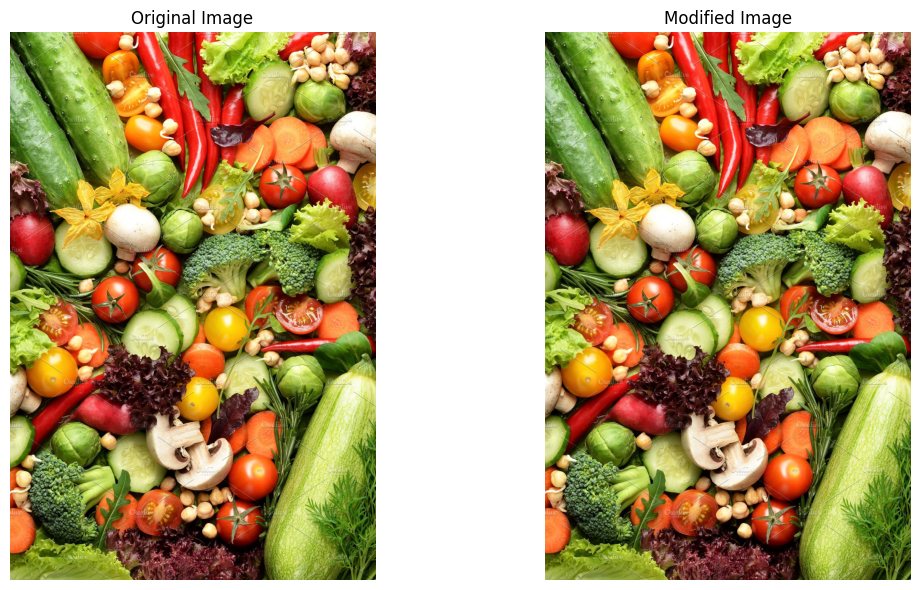

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(encoded, cv2.COLOR_BGR2RGB))
axs[1].set_title("Modified Image")
axs[1].axis('off')

plt.tight_layout()
plt.show()


In [56]:
key1 = input("Re-enter key to decode: ")

if key == key1:
    encrypted_back = bytearray()
    n = m = z = kl = 0
    for i in range(l):
        encrypted_back.append(x[n, m, z] ^ d[key[kl]])
        n += 1
        m += 1
        m = (m + 1) % 3
        z = (z + 1) % 3
        kl = (kl + 1) % len(key)
    decrypted = decrypt_mesg(bytes(encrypted_back), key1)
    print("Decrypted message:", decrypted)
else:
    print("Wrong key entered.")


Re-enter key to decode: 1234
Decrypted message: niteesh
